In [2]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CV_HW1')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **Part 1 : Loading the Images in Grayscale**

For this task, we will load two images: `zebra.png` and `cameraman.png`, and convert them to grayscale. These images are provided as part of the assignment, and you'll use them to perform the filtering tasks.

The images can be loaded using OpenCV (`cv2`). When loading the images, we'll specify a flag to load them directly in grayscale.

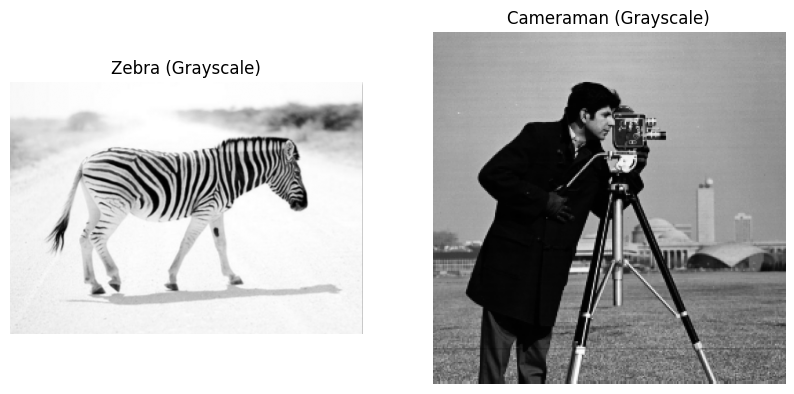

In [4]:
# Load the images in grayscale
zebra_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV_HW1/zebra.png', cv2.IMREAD_GRAYSCALE)
cameraman_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV_HW1/cameraman.png', cv2.IMREAD_GRAYSCALE)

# Display the images
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Zebra (Grayscale)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Cameraman (Grayscale)")
plt.axis("off")

plt.show()

## **Part 2: Padding Methods**

In [5]:
def zero_padding(image, p):
    """
    Add zero padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Zero-padded image
    """
    h, w = image.shape
    padded_image = np.zeros((h + 2*p, w + 2*p), dtype=image.dtype)
    padded_image[p:p+h, p:p+w] = image

    return padded_image

def symmetric_padding(image, p):
    """
    Add symmetric padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Symmetrically padded image
    """
    h, w = image.shape
    padded_image = np.zeros((h + 2*p, w + 2*p), dtype=image.dtype)
    padded_image[p:p+h, p:p+w] = image

    # Top border
    padded_image[0:p, p:p+w] = image[0:p, :][::-1, :]
    # Bottom border
    padded_image[p+h:, p:p+w] = image[-p:, :][::-1, :]
    # Left border:
    padded_image[:, 0:p] = padded_image[:, p:p+p][:, ::-1]
    # Right border:
    padded_image[:, p+w:] = padded_image[:, w:p+w][:, ::-1]

    return padded_image

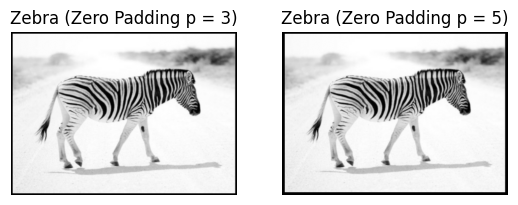

In [6]:
#Plot the results and compare

plt.subplot(1, 2, 1)
plt.imshow(zero_padding(zebra_image, 3), cmap='gray')
plt.title("Zebra (Zero Padding p = 3)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(zero_padding(zebra_image, 5), cmap='gray')
plt.title("Zebra (Zero Padding p = 5)")
plt.axis("off")

plt.show()

(np.float64(-0.5), np.float64(408.5), np.float64(295.5), np.float64(-0.5))

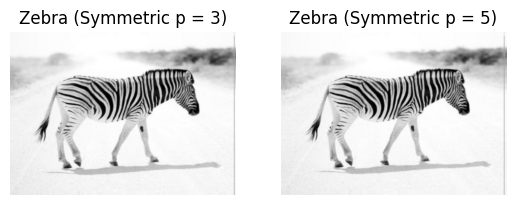

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(symmetric_padding(zebra_image, 3), cmap='gray')
plt.title("Zebra (Symmetric p = 3)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(symmetric_padding(zebra_image, 5), cmap='gray')
plt.title("Zebra (Symmetric p = 5)")
plt.axis("off")


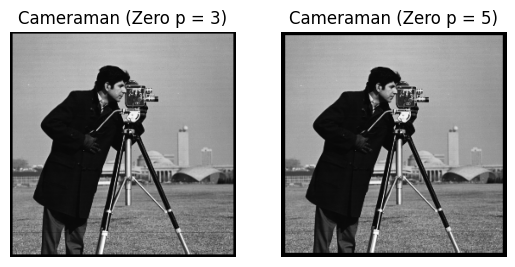

In [8]:
#Plot the results and compare

plt.subplot(1, 2, 1)
plt.imshow(zero_padding(cameraman_image, 3), cmap='gray')
plt.title("Cameraman (Zero p = 3)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(zero_padding(cameraman_image, 5), cmap='gray')
plt.title("Cameraman (Zero p = 5)")
plt.axis("off")

plt.show()

(np.float64(-0.5), np.float64(265.5), np.float64(265.5), np.float64(-0.5))

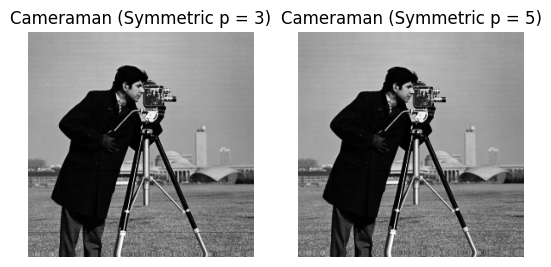

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(symmetric_padding(cameraman_image, 3), cmap='gray')
plt.title("Cameraman (Symmetric p = 3)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(symmetric_padding(cameraman_image, 5), cmap='gray')
plt.title("Cameraman (Symmetric p = 5)")
plt.axis("off")


## **Part 3: Implementing the Convolution Operator**

### **Introduction to Convolution**

The convolution operator is one of the core building blocks in image processing. Essentially, convolution applies a filter (or kernel) to an image to produce a transformed version of that image. This is achieved by sliding the kernel over the image and computing a weighted sum at each position.

A 2D convolution between an image `I` and a kernel `K` is defined as:


$$I'(x, y) = \sum_{m=-k}^{k} \sum_{n=-k}^{k} I(x+m, y+n) \cdot K(m, n)$$

Where:
- `I'(x, y)` is the output image at location `(x, y)`
- `I(x+m, y+n)` are the pixels of the input image
- `K(m, n)` are the corresponding kernel values
- `k` is the half-size of the kernel

In [10]:
def convolve(image, kernel, type = 1):
    """
    Apply 1D/2D convolution between the input image and the kernel.
    :param image: 2D NumPy array (grayscale image)
    :param kernel: 1D or 2D NumPy array (convolution kernel)
    :return: Convolved image
    """

    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    p_final = max(pad_h, pad_w)

    if type == 0:
        padded_image = zero_padding(image, p_final)
    else:
        padded_image = symmetric_padding(image, p_final)
    output_image = np.zeros_like(image, dtype=np.float64)

    for y in range(image_h):
        for x in range(image_w):
            patch = padded_image[y : y + kernel_h, x : x + kernel_w]
            output_image[y, x] = np.sum(patch * kernel)

    return output_image

In [11]:
# Following function is in case the Kernel is received as a 1D
def convolve_1D(image, kernel):
  if kernel.ndim == 1:
      horizontal_kernel = kernel.reshape(1, -1)
      intermediate_image = convolve(image, horizontal_kernel)

      vertical_kernel = kernel.reshape(-1, 1)
      output_image = convolve(intermediate_image, vertical_kernel)
  else:
      output_image = convolve(image, kernel)

  return output_image

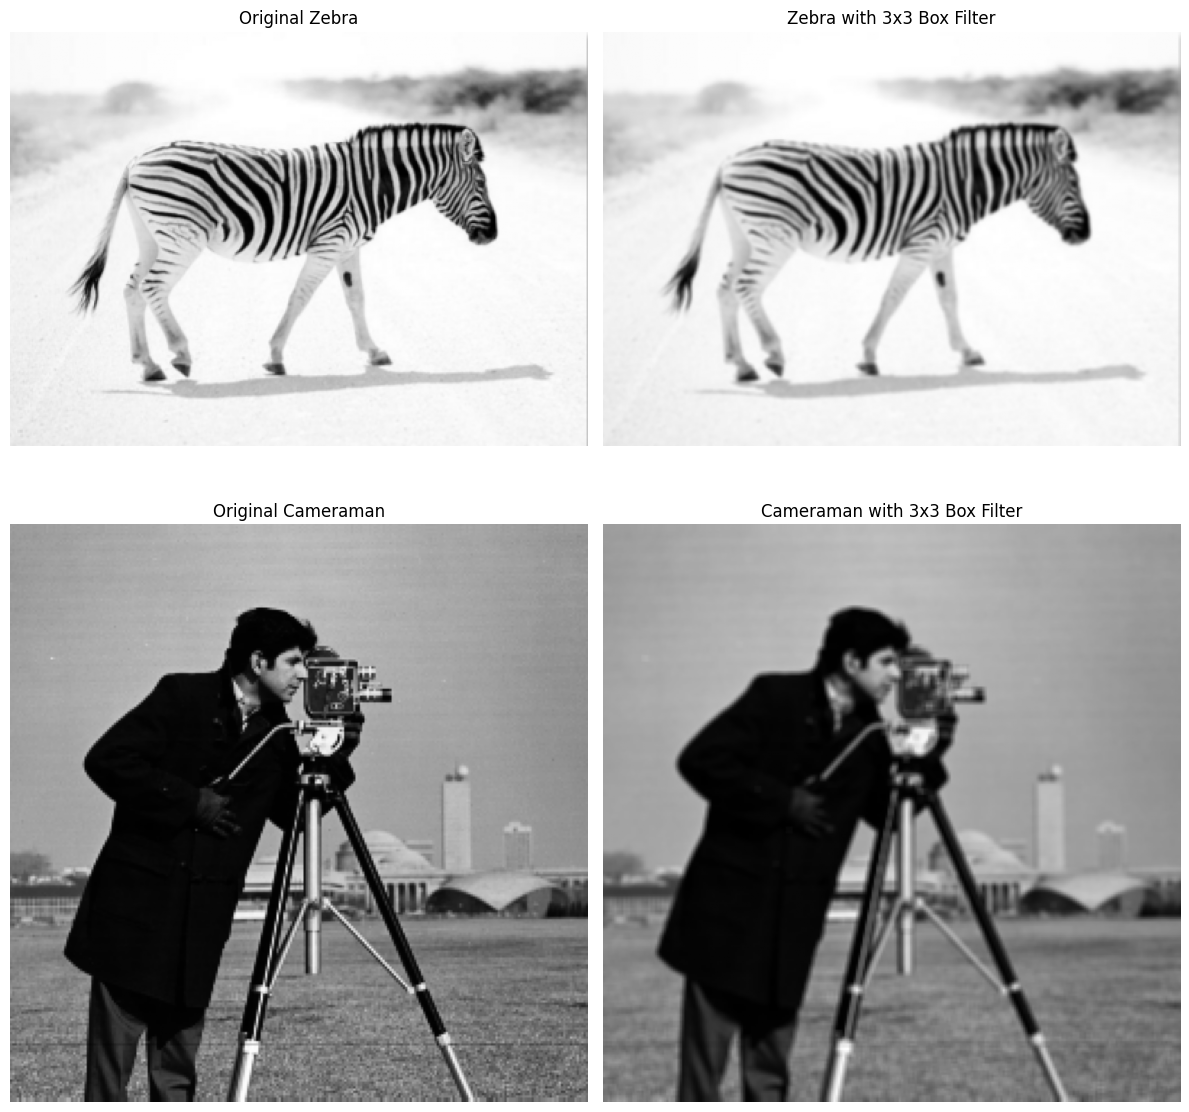

In [12]:
box_kernel_3x3 = np.ones((3, 3))
box_kernel_3x3 = box_kernel_3x3 / 9.0

zebra_blurred = convolve(zebra_image, box_kernel_3x3)
cameraman_blurred = convolve(cameraman_image, box_kernel_3x3)

plt.figure(figsize=(12, 12))

# Zebra Images
plt.subplot(2, 2, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Original Zebra")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(zebra_blurred, cmap='gray')
plt.title("Zebra with 3x3 Box Filter")
plt.axis("off")

# Cameraman Images
plt.subplot(2, 2, 3)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original Cameraman")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(cameraman_blurred, cmap='gray')
plt.title("Cameraman with 3x3 Box Filter")
plt.axis("off")

plt.tight_layout()
plt.show()

## **Part 4: Implementing a Gaussian Filter**

### **Introduction to the Gaussian Filter**

The **Gaussian filter** is used for blurring and smoothing images. It weighs pixels based on their distance from the center of the kernel, which results in a more natural blurring effect compared to the box filter. The Gaussian function with mean zero and standard deviation $\sigma$ is defined as:

$$
G(x, y) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Where:
- $\sigma $ is the standard deviation, controlling the extent of the blur.
- $(x, y)$ are the coordinates of the pixel relative to the center of the kernel.

In [13]:
def gaussian_kernel(size, sigma):
    """
    Create a 2D Gaussian kernel.
    :param size: Size of the kernel (must be odd)
    :param sigma: Standard deviation for the Gaussian
    :return: 2D Gaussian kernel (NumPy array)
    """

    if size % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]

    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    return kernel

## **Comparing Results with Different Sigma Values**

Now that you have implemented the Gaussian filter, it's time to see how different values of $\sigma$ affect the output.

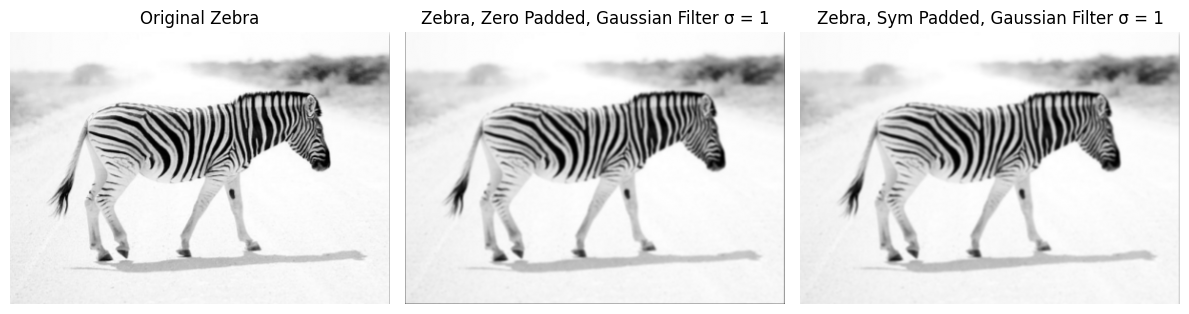

In [14]:
zebra_blurred_zero = convolve(zebra_image, gaussian_kernel(3, 1), 0)
zebra_blurred_sym = convolve(zebra_image, gaussian_kernel(3, 1), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Original Zebra")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_blurred_zero, cmap='gray')
plt.title("Zebra, Zero Padded, Gaussian Filter σ = 1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_blurred_sym, cmap='gray')
plt.title("Zebra, Sym Padded, Gaussian Filter σ = 1")
plt.axis("off")

plt.tight_layout()
plt.show()

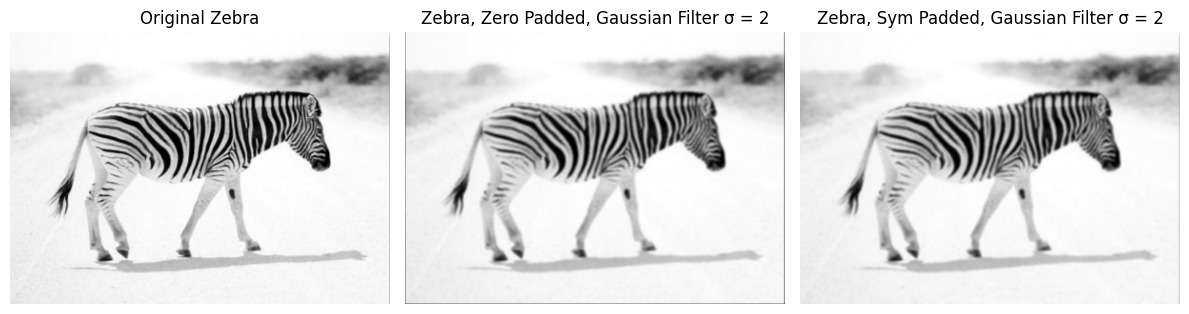

In [15]:
zebra_blurred_zero = convolve(zebra_image, gaussian_kernel(3, 2), 0)
zebra_blurred_sym = convolve(zebra_image, gaussian_kernel(3, 2), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Original Zebra")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_blurred_zero, cmap='gray')
plt.title("Zebra, Zero Padded, Gaussian Filter σ = 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_blurred_sym, cmap='gray')
plt.title("Zebra, Sym Padded, Gaussian Filter σ = 2")
plt.axis("off")

plt.tight_layout()
plt.show()

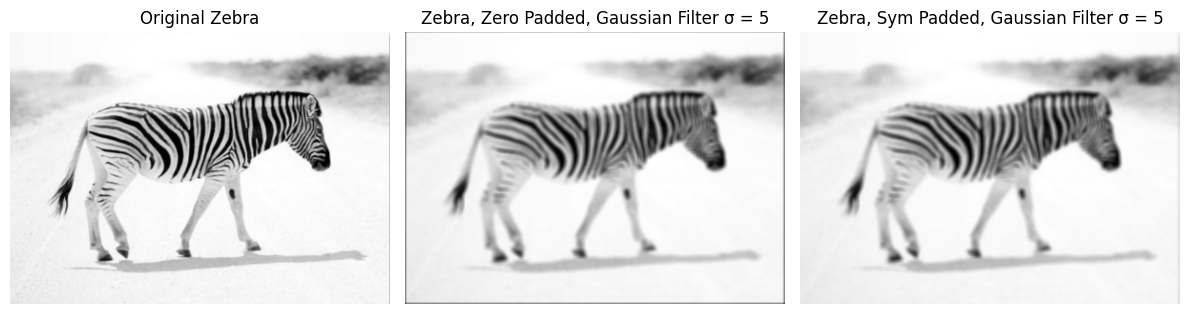

In [16]:
zebra_blurred_zero = convolve(zebra_image, gaussian_kernel(5, 5), 0)
zebra_blurred_sym = convolve(zebra_image, gaussian_kernel(5, 5), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Original Zebra")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_blurred_zero, cmap='gray')
plt.title("Zebra, Zero Padded, Gaussian Filter σ = 5")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_blurred_sym, cmap='gray')
plt.title("Zebra, Sym Padded, Gaussian Filter σ = 5")
plt.axis("off")

plt.tight_layout()
plt.show()

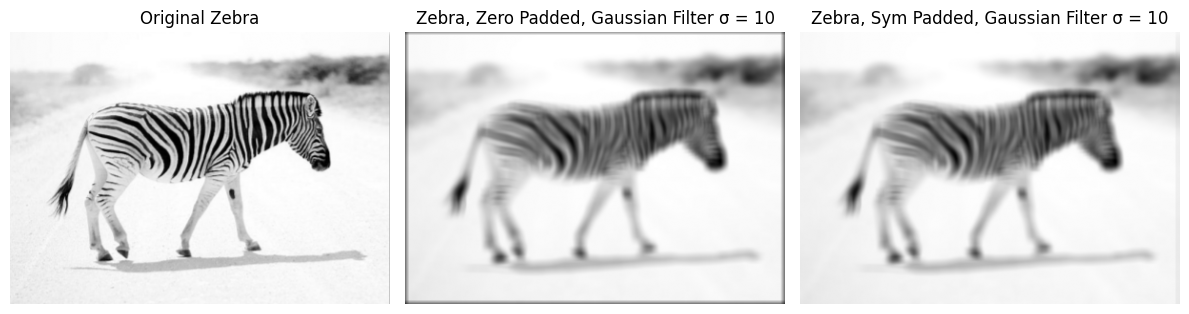

In [17]:
zebra_blurred_zero = convolve(zebra_image, gaussian_kernel(9, 10), 0)
zebra_blurred_sym = convolve(zebra_image, gaussian_kernel(9, 10), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Original Zebra")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_blurred_zero, cmap='gray')
plt.title("Zebra, Zero Padded, Gaussian Filter σ = 10")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_blurred_sym, cmap='gray')
plt.title("Zebra, Sym Padded, Gaussian Filter σ = 10")
plt.axis("off")

plt.tight_layout()
plt.show()

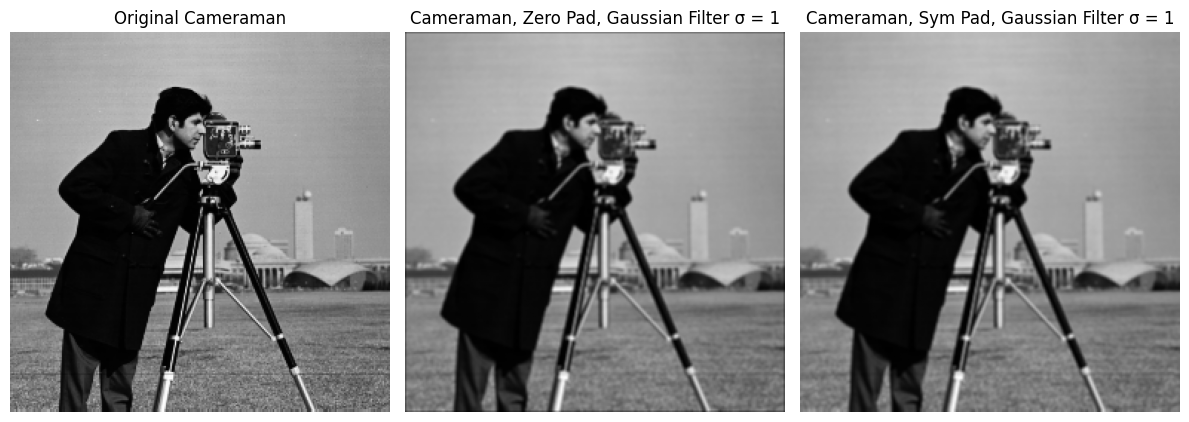

In [18]:
cameraman_blurred_zero = convolve(cameraman_image, gaussian_kernel(3, 1), 0)
cameraman_blurred_sym = convolve(cameraman_image, gaussian_kernel(3, 1), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original Cameraman")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_blurred_zero, cmap='gray')
plt.title("Cameraman, Zero Pad, Gaussian Filter σ = 1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_blurred_sym, cmap='gray')
plt.title("Cameraman, Sym Pad, Gaussian Filter σ = 1")
plt.axis("off")

plt.tight_layout()
plt.show()

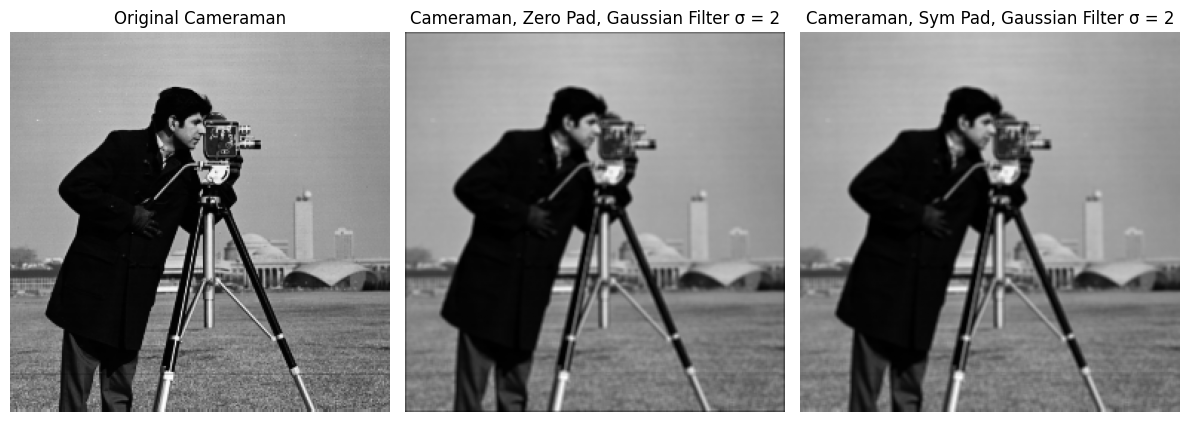

In [19]:
cameraman_blurred_zero = convolve(cameraman_image, gaussian_kernel(3, 2), 0)
cameraman_blurred_sym = convolve(cameraman_image, gaussian_kernel(3, 2), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original Cameraman")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_blurred_zero, cmap='gray')
plt.title("Cameraman, Zero Pad, Gaussian Filter σ = 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_blurred_sym, cmap='gray')
plt.title("Cameraman, Sym Pad, Gaussian Filter σ = 2")
plt.axis("off")

plt.tight_layout()
plt.show()

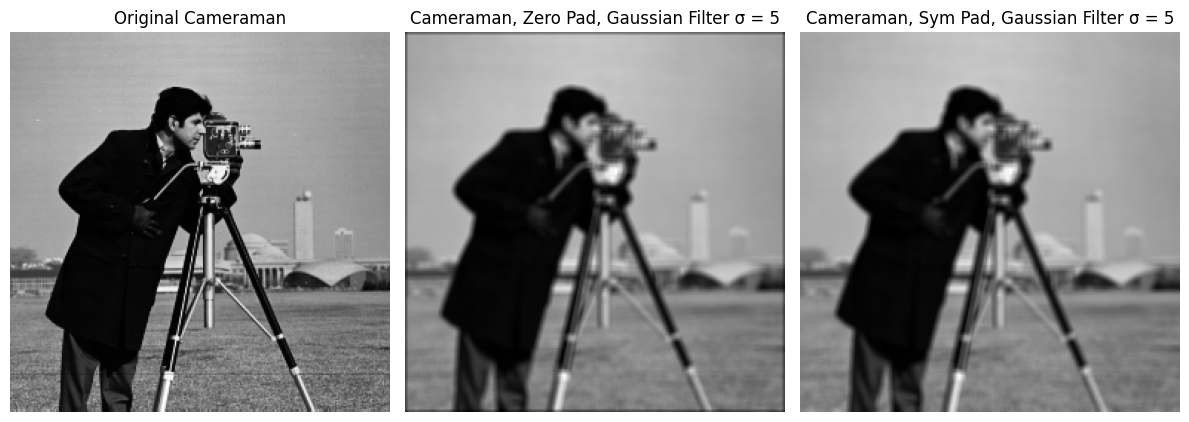

In [20]:
cameraman_blurred_zero = convolve(cameraman_image, gaussian_kernel(5, 5), 0)
cameraman_blurred_sym = convolve(cameraman_image, gaussian_kernel(5, 5), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original Cameraman")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_blurred_zero, cmap='gray')
plt.title("Cameraman, Zero Pad, Gaussian Filter σ = 5")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_blurred_sym, cmap='gray')
plt.title("Cameraman, Sym Pad, Gaussian Filter σ = 5")
plt.axis("off")

plt.tight_layout()
plt.show()

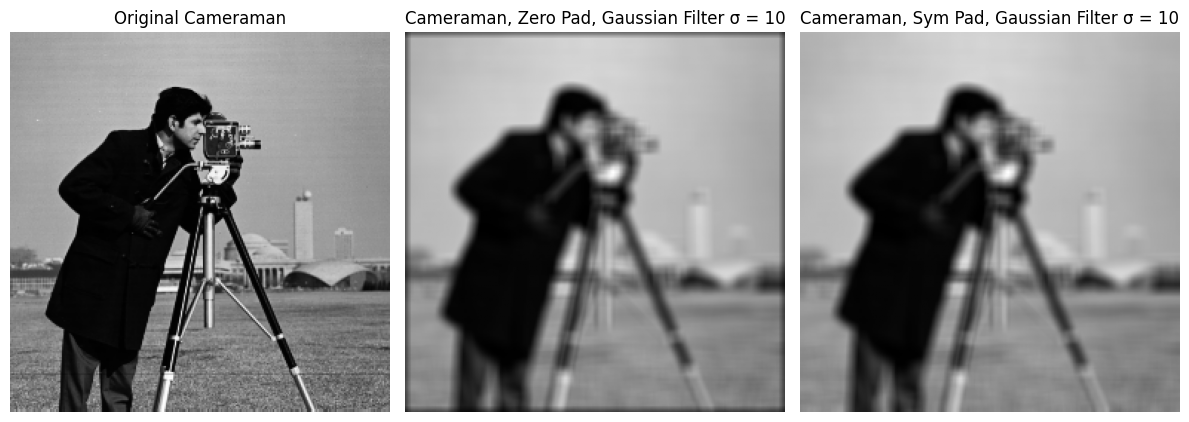

In [21]:
cameraman_blurred_zero = convolve(cameraman_image, gaussian_kernel(9, 10), 0)
cameraman_blurred_sym = convolve(cameraman_image, gaussian_kernel(9, 10), 1)

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original Cameraman")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_blurred_zero, cmap='gray')
plt.title("Cameraman, Zero Pad, Gaussian Filter σ = 10")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_blurred_sym, cmap='gray')
plt.title("Cameraman, Sym Pad, Gaussian Filter σ = 10")
plt.axis("off")

plt.tight_layout()
plt.show()

## **Part 5: Edge Detection Using 1D Filters**

### **Introduction to Edge Detection**

Edge detection is a critical step in image processing, often used to identify boundaries within images. You can use 1D filters for this purpose.

### **1D Edge Detection Filters:**
Common 1D edge detection filters include:

- **Sobel Filter (Horizontal)**:
$$
K_x =
\begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}
$$
- **Sobel Filter (Vertical)**:
$$
K_y =
\begin{bmatrix}
-1 \\
0 \\
1
\end{bmatrix}
$$

In [22]:
#1D (First Derivative) Edge Detection

sigma = 2.0
threshold_value = 50

kernel_size = int(sigma * 6)
if kernel_size % 2 == 0:
    kernel_size += 1 # Ensure it's odd

gaussian_k = gaussian_kernel(size=kernel_size, sigma=sigma)

zebra_smoothed = convolve(zebra_image, gaussian_k)
cameraman_smoothed = convolve(cameraman_image, gaussian_k)

sobel_y = np.array([[-1], [0], [1]])
sobel_x = np.array([[-1, 0, 1]])

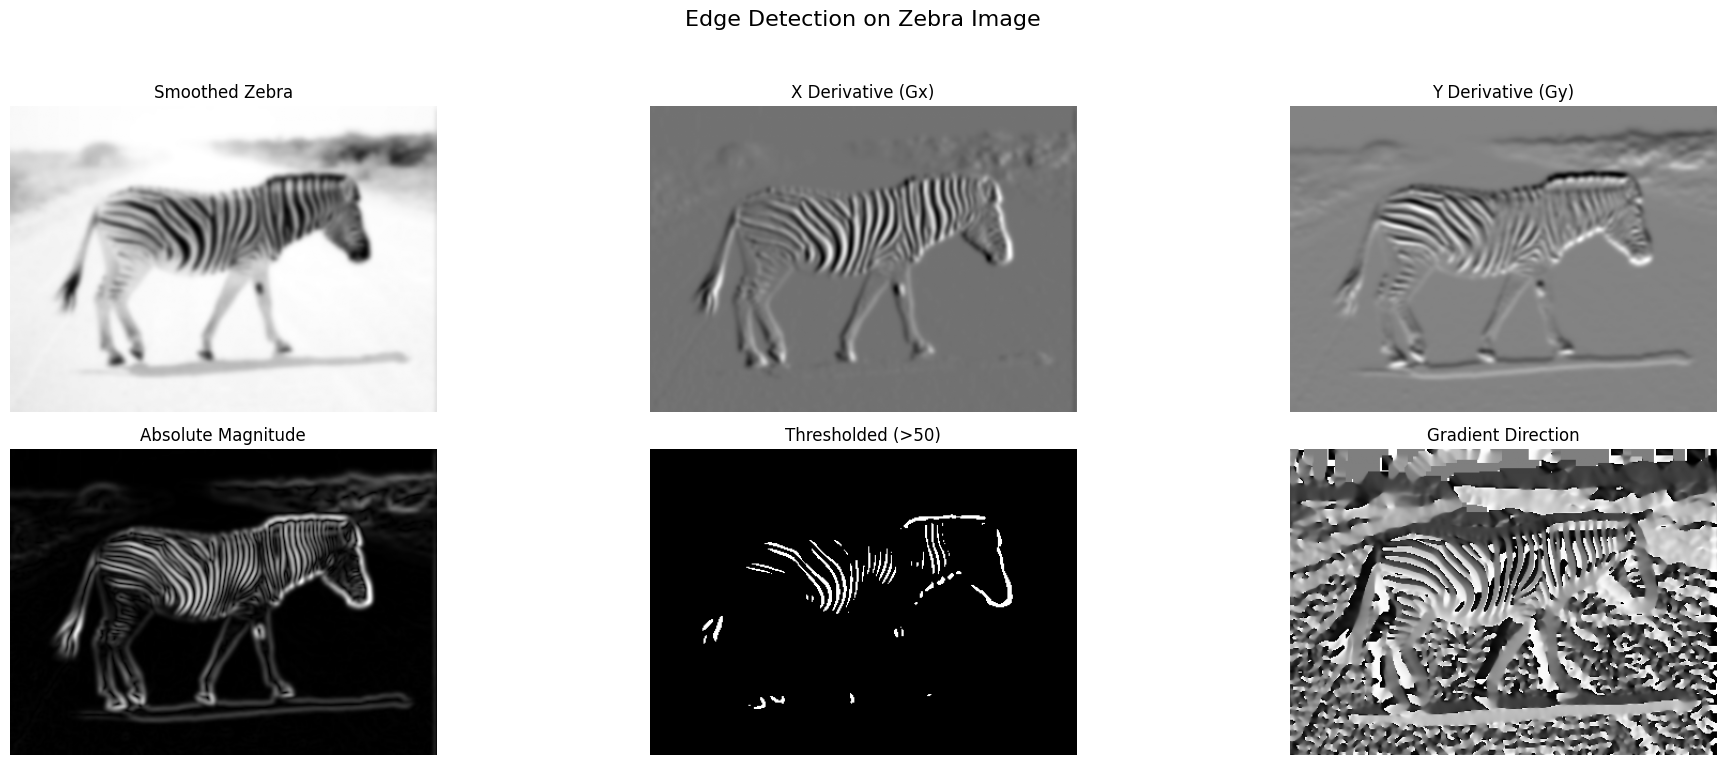

In [23]:
Gx_zebra = convolve(zebra_smoothed, sobel_x)
Gy_zebra = convolve(zebra_smoothed, sobel_y)

magnitude_zebra = np.sqrt(Gx_zebra**2 + Gy_zebra**2)
thresholded_zebra = (magnitude_zebra > threshold_value).astype(np.uint8) * 255
direction_zebra = np.arctan2(Gy_zebra, Gx_zebra)

plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1)
plt.imshow(zebra_smoothed, cmap='gray')
plt.title("Smoothed Zebra")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(Gx_zebra, cmap='gray')
plt.title("X Derivative (Gx)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(Gy_zebra, cmap='gray')
plt.title("Y Derivative (Gy)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(magnitude_zebra, cmap='gray')
plt.title("Absolute Magnitude")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(thresholded_zebra, cmap='gray')
plt.title(f"Thresholded (>{threshold_value})")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(direction_zebra, cmap='gray')
plt.title("Gradient Direction")
plt.axis("off")

plt.suptitle("Edge Detection on Zebra Image", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

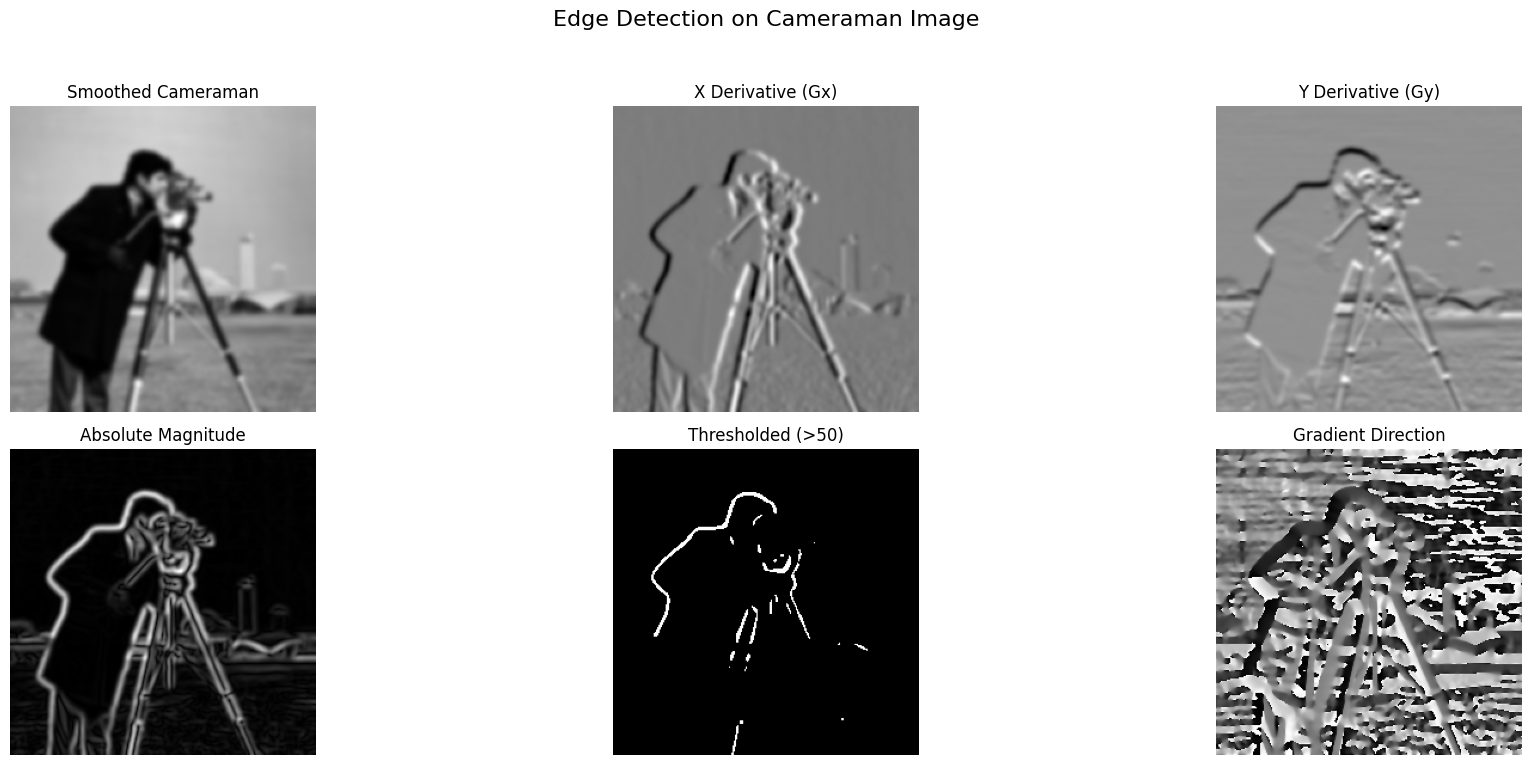

In [24]:
Gx_cameraman = convolve(cameraman_smoothed, sobel_x)
Gy_cameraman = convolve(cameraman_smoothed, sobel_y)

magnitude_cameraman = np.sqrt(Gx_cameraman**2 + Gy_cameraman**2)
thresholded_cameraman = (magnitude_cameraman > threshold_value).astype(np.uint8) * 255
direction_cameraman = np.arctan2(Gy_cameraman, Gx_cameraman)

plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1)
plt.imshow(cameraman_smoothed, cmap='gray')
plt.title("Smoothed Cameraman")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(Gx_cameraman, cmap='gray')
plt.title("X Derivative (Gx)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(Gy_cameraman, cmap='gray')
plt.title("Y Derivative (Gy)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(magnitude_cameraman, cmap='gray')
plt.title("Absolute Magnitude")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(thresholded_cameraman, cmap='gray')
plt.title(f"Thresholded (>{threshold_value})")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(direction_cameraman, cmap='gray')
plt.title("Gradient Direction")
plt.axis("off")

plt.suptitle("Edge Detection on Cameraman Image", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()